# 3 Base Modeling - Classical Time Series Models

   In this notebook we select two wells one representing a typical decline curve and one that does not follow a typical decline curve and then train each well to different classical time series algorithms (Autoregressive Models, Moving Average Models, Autoregressive Integrated Moving Average and Autoregressive Integrated Moving Average with Exogeneous Variables) and calculate the mean absolute percentage error for each model and select the best models.

## TABLE OF CONTENTS:
* [3.1 Import Relevant Package](#1)
* [3.2 Import CSV](#2)
* [3.3 Examine Data](#3)
* [3.4 Preprocessing and training for well with a typical decline curve profile](#4)
    * [3.4.1 AR model](#5)
    * [3.4.2 MA Model](#6)
    * [3.4.3 ARIMA Model](#7)
    * [3.4.4 ARIMAX Model](#8)
    * [3.4.5 Performance of Models](#9)
* [3.5 Preprocessing and training for well that does not have typical decline curve profile](#10)
    * [3.5.1 AR model](#11)
    * [3.5.2 MA Model](#12)
    * [3.5.3 ARIMA Model](#13)
    * [3.5.4 ARIMAX Model](#14)
    * [3.5.5 Performance of Models](#15) 

 <b>3.1 Import Relevant Package <b/> <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from operator import itemgetter
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import TimeSeriesSplit

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

 <b>3.2 Import CSV <b/> <a class="anchor" id="2"></a>

In [3]:
df = pd.read_csv('Monthly.csv')

 <b>3.3 Examine Data <b/>  <a class="anchor" id="3"></a>

Call head of data

In [4]:
df.head()

,level_0,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,3,3,2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,6244.0,0.0,15/9-F-1 C,265.236380,98.164455,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
1,4,4,2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,4530.0,0.0,15/9-F-1 C,223.846688,107.821219,156.003875,0.0,46.411330,67.842750,55.589875,39.336469,21293.0,0.0,863.0,0.0
2,5,5,2014-09-01,229.762933,107.569067,188.690067,0.0,43.583238,41.072900,53.928133,15.410067,9170.0,0.0,8318.0,0.0,15/9-F-1 C,217.370621,108.005379,157.585724,0.0,46.633436,59.784828,56.344345,31.480724,18893.0,0.0,1989.0,0.0
3,6,6,2014-10-01,220.280879,108.347424,184.229091,0.0,51.007502,36.051788,54.949455,8.193061,10102.0,0.0,11021.0,0.0,15/9-F-1 C,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,6244.0,0.0
4,7,7,2014-11-03,228.134321,107.203750,190.050214,0.0,40.942230,38.083929,47.676036,15.755357,6071.0,251.0,6582.0,0.0,15/9-F-1 C,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,4530.0,0.0


Call columns of dataframe

In [5]:
df.columns

Index(['level_0', 'index', 'DATEPRD', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL',
       'NPD_WELL_BORE_NAME', 'AVG_DOWNHOLE_PRESSURE.shifted3',
       'AVG_DOWNHOLE_TEMPERATURE.shifted3', 'AVG_DP_TUBING.shifted3',
       'AVG_ANNULUS_PRESS.shifted3', 'AVG_CHOKE_SIZE_P.shifted3',
       'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3', 'DP_CHOKE_SIZE.shifted3',
       'BORE_OIL_VOL.shifted3', 'BORE_GAS_VOL.shifted3',
       'BORE_WAT_VOL.shifted3', 'BORE_WI_VOL.shifted3'],
      dtype='object')

Find unique wells in 'NPD_WELL_BORE_NAME' column.

In [6]:
df['NPD_WELL_BORE_NAME'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

 <b>3.4 Preprocessing and training for well with a typical decline curve profile<b/> <a class="anchor" id="4"></a>

From the previous notebook we can see that well F-14 follows a typical decline curve thus we will use this as the first well for modelling. 

In [7]:
df1 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-14'].copy()

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

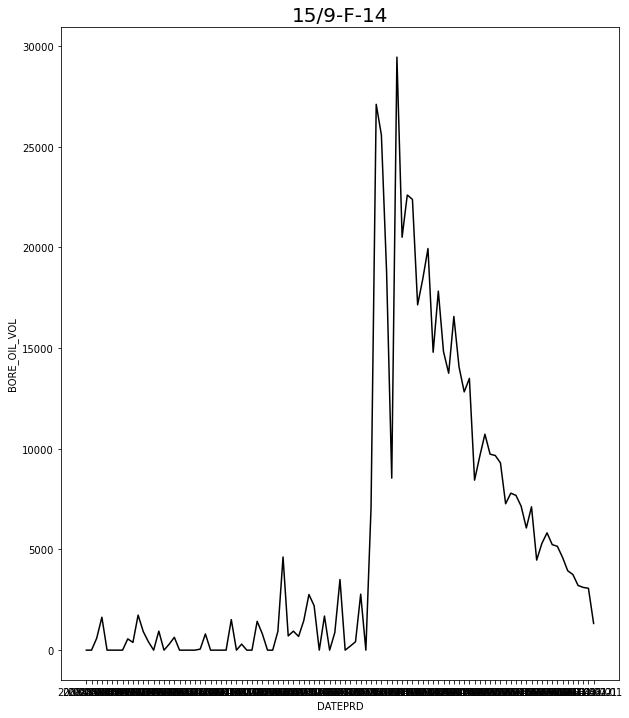

In [8]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

In [9]:
df1.shape

(99, 28)

Examine head of data

In [10]:
df1.head()

,level_0,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
158,171,3,2008-05-01,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.000100,67.387511,0.000000,0.000000,2.271700,0.0,0.0,0.0,0.0
159,172,4,2008-06-02,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.001931,65.063804,0.000000,0.001517,20.123034,0.0,0.0,0.0,0.0
160,173,5,2008-07-01,255.998355,100.452387,191.579903,4.273996,44.367193,64.418452,50.857258,45.400065,592.0,0.0,122.0,0.0,15/9-F-14,7.769155,3.171126,6.421770,0.350933,65.141261,1.384353,2.570101,26.050425,0.0,0.0,0.0,0.0
161,174,6,2008-08-01,249.399021,102.608122,180.185938,8.490311,41.985713,69.248955,58.543098,46.706218,1636.0,0.0,223.0,0.0,15/9-F-14,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0
162,175,7,2008-09-01,231.776500,104.511867,159.157467,8.422388,43.718179,72.618967,72.336033,40.767267,0.0,0.0,276.0,0.0,15/9-F-14,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0


Drop 'index' and 'level_0' columns from df1 

In [11]:
df1.drop(columns=['index','level_0'], inplace=True)

Reset index of dataframe

In [12]:
df1.reset_index(inplace=True)

Examine dataframe

In [13]:
df1.head()

,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,158,2008-05-01,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.000100,67.387511,0.000000,0.000000,2.271700,0.0,0.0,0.0,0.0
1,159,2008-06-02,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.001931,65.063804,0.000000,0.001517,20.123034,0.0,0.0,0.0,0.0
2,160,2008-07-01,255.998355,100.452387,191.579903,4.273996,44.367193,64.418452,50.857258,45.400065,592.0,0.0,122.0,0.0,15/9-F-14,7.769155,3.171126,6.421770,0.350933,65.141261,1.384353,2.570101,26.050425,0.0,0.0,0.0,0.0
3,161,2008-08-01,249.399021,102.608122,180.185938,8.490311,41.985713,69.248955,58.543098,46.706218,1636.0,0.0,223.0,0.0,15/9-F-14,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0
4,162,2008-09-01,231.776500,104.511867,159.157467,8.422388,43.718179,72.618967,72.336033,40.767267,0.0,0.0,276.0,0.0,15/9-F-14,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0


In [14]:
df1.tail()

,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
94,252,2016-03-01,267.556452,99.625387,239.260194,21.033677,98.741093,28.296194,88.031548,1.885323,3755.0,0.0,0.0,0.0,15/9-F-14,266.092581,99.543355,237.803774,13.742226,96.283024,28.288935,86.405226,1.990290,5156.0,0.0,0.0,0.0
95,253,2016-04-01,268.224484,99.595581,239.024968,22.144323,82.407986,29.199452,87.575323,3.200581,3212.0,0.0,0.0,0.0,15/9-F-14,266.648774,99.556677,238.038129,14.120516,94.893441,28.610548,85.694968,2.124839,4607.0,0.0,0.0,0.0
96,254,2016-05-02,270.783200,99.774267,239.266900,22.530533,42.842672,31.516300,87.679733,5.695933,3116.0,0.0,0.0,0.0,15/9-F-14,266.755552,99.546138,238.278828,18.877897,98.930961,28.476655,87.340931,1.757690,3942.0,0.0,0.0,0.0
97,255,2016-06-01,269.827700,100.053033,238.942100,23.435200,47.767466,30.885567,88.542800,5.303067,3073.0,0.0,0.0,0.0,15/9-F-14,267.556452,99.625387,239.260194,21.033677,98.741093,28.296194,88.031548,1.885323,3755.0,0.0,0.0,0.0
98,256,2016-07-01,286.916323,98.268194,259.612484,12.011452,29.669248,27.303903,41.712613,7.113097,1326.0,0.0,0.0,0.0,15/9-F-14,268.224484,99.595581,239.024968,22.144323,82.407986,29.199452,87.575323,3.200581,3212.0,0.0,0.0,0.0


Drop index column

In [15]:
df1.drop(columns=['index'], inplace=True)

Set 'DATEPRD' column as index.

In [16]:
df1.set_index('DATEPRD',inplace=True)

Convert index as datetime

In [17]:
df1.index = pd.to_datetime(df1.index)

Find datatypes for each column

In [18]:
df1.dtypes

AVG_DOWNHOLE_PRESSURE                float64
AVG_DOWNHOLE_TEMPERATURE             float64
AVG_DP_TUBING                        float64
AVG_ANNULUS_PRESS                    float64
AVG_CHOKE_SIZE_P                     float64
AVG_WHP_P                            float64
AVG_WHT_P                            float64
DP_CHOKE_SIZE                        float64
BORE_OIL_VOL                         float64
BORE_GAS_VOL                         float64
BORE_WAT_VOL                         float64
BORE_WI_VOL                          float64
NPD_WELL_BORE_NAME                    object
AVG_DOWNHOLE_PRESSURE.shifted3       float64
AVG_DOWNHOLE_TEMPERATURE.shifted3    float64
AVG_DP_TUBING.shifted3               float64
AVG_ANNULUS_PRESS.shifted3           float64
AVG_CHOKE_SIZE_P.shifted3            float64
AVG_WHP_P.shifted3                   float64
AVG_WHT_P.shifted3                   float64
DP_CHOKE_SIZE.shifted3               float64
BORE_OIL_VOL.shifted3                float64
BORE_GAS_V

Examine head of dataframe

In [19]:
df1.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,,,,,
2008-05-01,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.000100,67.387511,0.000000,0.000000,2.271700,0.0,0.0,0.0,0.0
2008-06-02,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.001931,65.063804,0.000000,0.001517,20.123034,0.0,0.0,0.0,0.0
2008-07-01,255.998355,100.452387,191.579903,4.273996,44.367193,64.418452,50.857258,45.400065,592.0,0.0,122.0,0.0,15/9-F-14,7.769155,3.171126,6.421770,0.350933,65.141261,1.384353,2.570101,26.050425,0.0,0.0,0.0,0.0
2008-08-01,249.399021,102.608122,180.185938,8.490311,41.985713,69.248955,58.543098,46.706218,1636.0,0.0,223.0,0.0,15/9-F-14,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0
2008-09-01,231.776500,104.511867,159.157467,8.422388,43.718179,72.618967,72.336033,40.767267,0.0,0.0,276.0,0.0,15/9-F-14,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0


Create list from column names

In [20]:
items_list = list(df1.columns)

Create list of columns that we are not including in modelling

In [21]:
list_to_remove = ['AVG_DOWNHOLE_PRESSURE.shifted3',
 'AVG_DOWNHOLE_TEMPERATURE.shifted3',
 'AVG_DP_TUBING.shifted3',
 'AVG_ANNULUS_PRESS.shifted3',
 'AVG_CHOKE_SIZE_P.shifted3',
 'AVG_WHP_P.shifted3',
 'AVG_WHT_P.shifted3',
 'DP_CHOKE_SIZE.shifted3',
 'BORE_OIL_VOL.shifted3',
 'BORE_GAS_VOL.shifted3',
 'BORE_WAT_VOL.shifted3',
 'BORE_WI_VOL.shifted3','NPD_WELL_BORE_NAME','BORE_WI_VOL']

Drop irrelevant columns

In [22]:
df1.drop(columns=list_to_remove,inplace=True)

Create final list of columns to be included in modelling

In [23]:
columnlist = list(set(items_list)-set(list_to_remove))

In [24]:
columnlist

['AVG_WHP_P',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'BORE_GAS_VOL',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_WHT_P',
 'AVG_CHOKE_SIZE_P',
 'BORE_OIL_VOL',
 'AVG_DOWNHOLE_TEMPERATURE',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

Find correlation between target variable and each feature

In [25]:
for element in columnlist:
    print( element , df1['BORE_OIL_VOL'].corr(df1[element]))

AVG_WHP_P -0.4044588109721314
AVG_DP_TUBING 0.36350973016797383
AVG_ANNULUS_PRESS 0.7124373834184683
BORE_GAS_VOL 0.1997872648975512
AVG_DOWNHOLE_PRESSURE 0.1913455602229185
AVG_WHT_P 0.24553624759225262
AVG_CHOKE_SIZE_P 0.5320877334934611
BORE_OIL_VOL 1.0
AVG_DOWNHOLE_TEMPERATURE 0.037926181667197606
DP_CHOKE_SIZE -0.48210812924238944
BORE_WAT_VOL -0.1672047589562501


Remove irrelevant data

In [26]:
df1= df1[df1.index >= '2013-02-01'].copy()

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

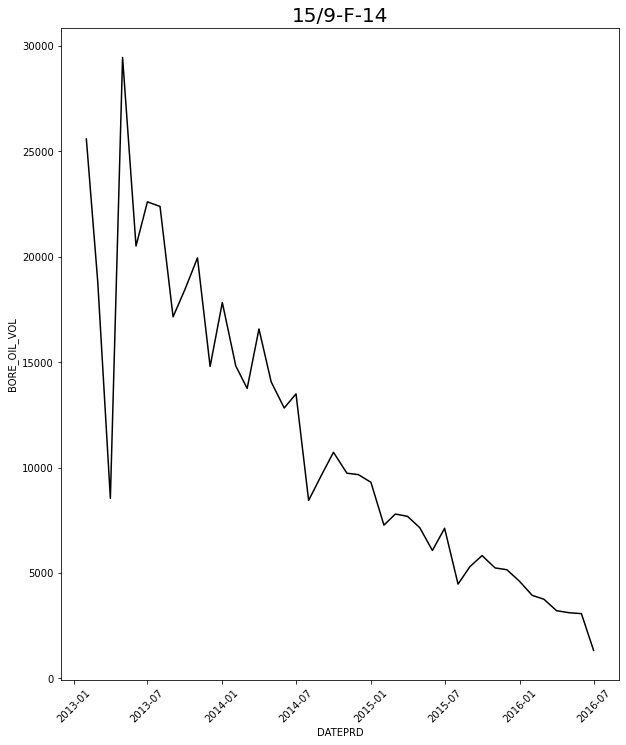

In [27]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
plt.xticks(rotation = 45)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')


In [28]:
df1.shape

(42, 11)

Plot ACF to examine weather oil production time series is stationary.

Zero-differencing

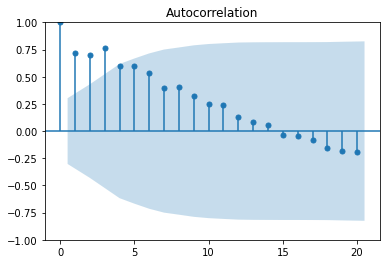

In [29]:
plot_acf(df1['BORE_OIL_VOL'], lags= 20, alpha=0.05);

From the plot we can see that the time series is not stationary

Call adfuller function on time series

In [30]:
adfuller(df1['BORE_OIL_VOL'])

(-3.0565216560614554,
 0.029942619436304975,
 5,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 514.4717450780674)

Based on the adf test we can tell that the time series is not stationary.

1st-Order Differencing

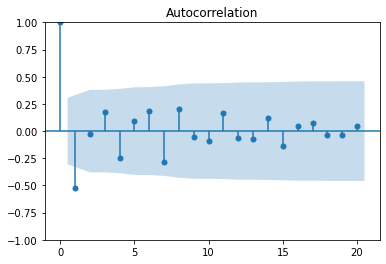

In [31]:
plot_acf(df1['BORE_OIL_VOL'].diff().dropna(), lags= 20, alpha=0.05);

From the ACF the 1st-Order differencing makes the time series look stationary.

Call the ADF on the first order difference

In [32]:
adfuller(df1['BORE_OIL_VOL'].diff().dropna())

(-2.4491243641201876,
 0.12834851119668744,
 5,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 501.59829364936394)

The time series is still not stationary we will do a second order differencing

2nd-Order Differencing

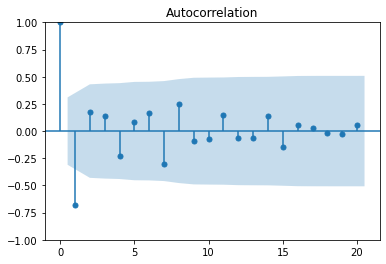

In [33]:
plot_acf(df1['BORE_OIL_VOL'].diff().diff().dropna(), lags= 20, alpha=0.05);

Call the ADF on the second order difference

In [34]:
adfuller(df1['BORE_OIL_VOL'].diff().diff().dropna())

(-4.907848665433435,
 3.3668107989803735e-05,
 9,
 30,
 {'1%': -3.6699197407407405,
  '5%': -2.9640707407407407,
  '10%': -2.621171111111111},
 485.9887832271845)

From the ADF test we can see that 2nd-Order differencing makes the time series stationary.

Split data Train/Test datasets

In [35]:
df1.tail(5)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,
2016-03-01,267.556452,99.625387,239.260194,21.033677,98.741093,28.296194,88.031548,1.885323,3755.0,0.0,0.0
2016-04-01,268.224484,99.595581,239.024968,22.144323,82.407986,29.199452,87.575323,3.200581,3212.0,0.0,0.0
2016-05-02,270.783200,99.774267,239.266900,22.530533,42.842672,31.516300,87.679733,5.695933,3116.0,0.0,0.0
2016-06-01,269.827700,100.053033,238.942100,23.435200,47.767466,30.885567,88.542800,5.303067,3073.0,0.0,0.0
2016-07-01,286.916323,98.268194,259.612484,12.011452,29.669248,27.303903,41.712613,7.113097,1326.0,0.0,0.0


In [36]:
Train=df1.loc[:'2016-03-01']

In [37]:
Test=df1.loc['2016-04-01':]

The last 4 months will serve as the test set

 <b>3.4.1 AR model<b/> <a class="anchor" id="5"></a>

Create an AR model of order P=5 and D=2 based on the ACF and ADF tests.

In [38]:
ARIMA_model1 = ARIMA(Train['BORE_OIL_VOL'], order=(5,2,0))

Fit data to model

In [39]:
result = ARIMA_model1.fit()

Print summary results

In [40]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           BORE_OIL_VOL   No. Observations:                   38
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -344.970
Date:                Thu, 03 Mar 2022   AIC                            701.939
Time:                        22:51:56   BIC                            711.440
Sample:                    02-01-2013   HQIC                           705.255
                         - 03-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3648      0.322     -4.236      0.000      -1.996      -0.733
ar.L2         -1.5997      0.514     -3.112      0.002      -2.607      -0.592
ar.L3         -1.0681      0.748     -1.428      0.1

The first model has an AIC score of 701 and BIC score of 711.

Try different combinations of p and d to find the best AR model.

Calculate and plot BIC for each model

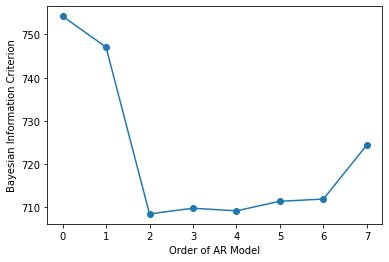

In [41]:
BIC = np.zeros(8)
for p in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(p,2,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(0,8), BIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

Calculate and plot AIC for each model

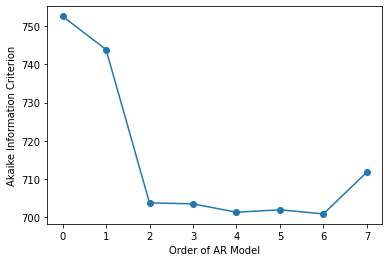

In [42]:
AIC = np.zeros(8)
for p in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(p,2,0))
    res = mod.fit()
# Save AIC for AR(p)    
    AIC[p] = res.aic
    
# Plot the aiC as a function of p
plt.plot(range(0,8), AIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

The best model is the model with p=2 and p=6 and d=2

In [43]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(2,2,0))
result = mod.fit()

Predict last 4 months of oil production

In [44]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    3206.747684
2016-05-02    2660.281741
2016-06-01    2363.190575
2016-07-01    1834.338717
Freq: BMS, Name: predicted_mean, dtype: float64

Create dataframe that will accumalete predictions of different models

Save last 4 months of oil production to Summary dataframe.

In [45]:
Summary =pd.DataFrame(Test['BORE_OIL_VOL'])

Save AR model p = 2 and d = 2 to Summary dataframe

In [46]:
Summary['AR_order_2_difference_2']=result.predict(start='2016-04-01',end='2016-07-01')

Since the AIC score for the model with order p=6 and d=2 is lower than the model with the lowest BIC model we will also use the former model for comparison with other models.

In [47]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(6,2,0))
result = mod.fit()

Predict last 4 months of oil production

In [48]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    2993.461331
2016-05-02    2251.883892
2016-06-01    1980.618121
2016-07-01    1260.698024
Freq: BMS, Name: predicted_mean, dtype: float64

Save AR model p = 6 and d = 2 to Summary dataframe

In [49]:
Summary['AR_order_6_difference_2']=result.predict(start='2016-04-01',end='2016-07-01')

Checking the summary table so far we have the predictions for the two AR models

In [50]:
Summary

,BORE_OIL_VOL,AR_order_2_difference_2,AR_order_6_difference_2
DATEPRD,,,
2016-04-01,3212.0,3206.747684,2993.461331
2016-05-02,3116.0,2660.281741,2251.883892
2016-06-01,3073.0,2363.190575,1980.618121
2016-07-01,1326.0,1834.338717,1260.698024


 <b>3.4.2 MA Model<b/> <a class="anchor" id="6"></a>

Try different combinations of q and d to find the best AR model.

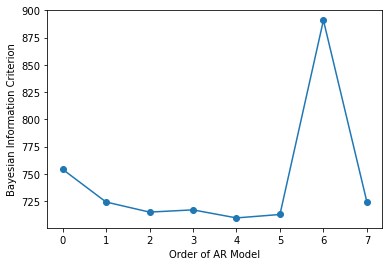

[754.21146532 724.12026246 714.85050321 716.89399389 709.50734245
 712.65733184 891.03030411 724.13872586]


In [51]:
BIC = np.zeros(8)
for q in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,2,q))
    res = mod.fit()
# Save BIC for MA(q)    
    BIC[q] = res.bic
    
# Plot the BIC as a function of q
plt.plot(range(0,8), BIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()
print(BIC)

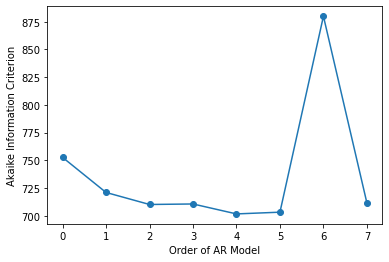

[752.62794639 720.95322458 710.0999464  710.55991814 701.58974776
 703.15621821 879.94567154 711.47057435]


In [52]:
AIC = np.zeros(8)
for q in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,2,q))
    res = mod.fit()
# Save AIC for MA(q)    
    AIC[q] = res.aic
    
# Plot the aiC as a function of q
plt.plot(range(0,8), AIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()
print(AIC)

The best MA models is of order d=2 and q=4 a based on the AIC and BIC scores

Fit MA model d=2 and q=4 to the training set.

In [53]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,2,4))
result = mod.fit()

Print model predictions

In [54]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    4168.597989
2016-05-02    4241.054175
2016-06-01    4359.783739
2016-07-01    4532.438750
Freq: BMS, Name: predicted_mean, dtype: float64

Save model predictions to Summary dataframe

In [55]:
Summary['MA_order_4_difference_2']=result.predict(start='2016-04-01',end='2016-07-01')

Check Summary dataframe

In [56]:
Summary

,BORE_OIL_VOL,AR_order_2_difference_2,AR_order_6_difference_2,MA_order_4_difference_2
DATEPRD,,,,
2016-04-01,3212.0,3206.747684,2993.461331,4168.597989
2016-05-02,3116.0,2660.281741,2251.883892,4241.054175
2016-06-01,3073.0,2363.190575,1980.618121,4359.783739
2016-07-01,1326.0,1834.338717,1260.698024,4532.438750


 <b>3.4.3 ARIMA Model<b/> <a class="anchor" id="7"></a>

The ARIMA model is a combination of the AR model and MA model with differencing.

Iterate through different ARIMA models with p from 0 to 6, d=2 and q  from 0 to 6.

In [57]:
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(Train['BORE_OIL_VOL'], order=(p,2,q))
        results = model.fit()        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
        print(p,q,results.aic, results.bic)

0 0 752.6279463856123 754.2114653240684
0 1 720.9532245835937 724.120262460506
0 2 710.099946398025 714.8505032133934
0 3 710.5599181362493 716.8939938900737
0 4 701.5897477554174 709.507342447698
0 5 703.1562182104793 712.657331841216
0 6 879.9456715443338 891.0303041135265
1 0 743.9142782232926 747.0813161002048
1 1 721.2830344026053 726.0335912179736
1 2 721.0257242124421 727.3597999662666
1 3 704.8381766916369 712.7557713839175
1 4 703.2585900059805 712.7597036367172
1 5 717.0627738074702 728.147406376663
1 6 722.3261685130212 734.9943200206701
2 0 703.7656507317346 708.5162075471029
2 1 700.9666671797833 707.3007429336077
2 2 701.3005764483968 709.2181711406773
2 3 711.5697451448722 721.0708587756088
2 4 711.9000811569639 722.9847137261567
2 5 926.0860435589665 938.7541950666154
2 6 862.859468517144 877.111138963249
3 0 703.4950229514596 709.8290987052841
3 1 702.9284264969051 710.8460211891856
3 2 883.1906807664227 892.6917943971594
3 3 711.4167138280284 722.5013463972211
3 4 832

Order models by AIC score

In [58]:
order_aic_bic_ordered = sorted(order_aic_bic,key=itemgetter(2))

Print order_aic_bic_ordered

In [59]:
order_aic_bic_ordered

[(6, 0, 700.8623322222672, 711.94696479146),
 (2, 1, 700.9666671797833, 707.3007429336077),
 (2, 2, 701.3005764483968, 709.2181711406773),
 (4, 0, 701.3081764723007, 709.2257711645813),
 (0, 4, 701.5897477554174, 709.507342447698),
 (5, 0, 701.9390950366867, 711.4402086674233),
 (4, 1, 702.8379933799108, 712.3391070106475),
 (3, 1, 702.9284264969051, 710.8460211891856),
 (0, 5, 703.1562182104793, 712.657331841216),
 (1, 4, 703.2585900059805, 712.7597036367172),
 (3, 0, 703.4950229514596, 709.8290987052841),
 (2, 0, 703.7656507317346, 708.5162075471029),
 (1, 3, 704.8381766916369, 712.7557713839175),
 (5, 1, 705.1644409723393, 716.2490735415321),
 (6, 1, 705.9626770895749, 718.6308285972237),
 (4, 2, 709.9260216600045, 721.0106542291973),
 (0, 2, 710.099946398025, 714.8505032133934),
 (0, 3, 710.5599181362493, 716.8939938900737),
 (3, 3, 711.4167138280284, 722.5013463972211),
 (2, 3, 711.5697451448722, 721.0708587756088),
 (2, 4, 711.9000811569639, 722.9847137261567),
 (1, 5, 717.062773

ARIMA p = 6, d = 2, q = 0 has the lowest AIC score

Fit data to the model

In [60]:
model = SARIMAX(Train['BORE_OIL_VOL'], order=(6,2,0),initialization='approximate_diffuse')
result = model.fit()

Save model predictions to Summary dataframe

In [61]:
Summary['ARIMA_p_order_6_difference_2_q_order_0']=result.predict(start='2016-04-01',end='2016-07-01')

 <b>3.4.4 ARIMAX Model<b/> <a class="anchor" id="8"></a>

ARIMAX models are ARIMA models with the exogeneous variables. The following are used as exogeneous variables:
'AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_WHT_P','BORE_GAS_VOL','DP_CHOKE_SIZE','AVG_CHOKE_SIZE_P','AVG_DOWNHOLE_TEMPERATURE','AVG_WHP_P','BORE_WAT_VOL'.

Iterate through different ARIMAX models with p from 0 to 6, d=2 and q from 0 to 6.

In [62]:
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(Train['BORE_OIL_VOL'], order=(p,2,q),exog=Train[['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']])
        results = model.fit()        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
        print(p,q,results.aic, results.bic)

0 0 719.5668754855491 733.8185459316541
0 1 732.6360757463308 748.4712651308919
0 2 703.6336299531395 721.0523382761567
0 3 737.9759066799518 756.9781339414251
0 4 700.0381990997516 720.623945299681
0 5 694.75647416086 716.9257392992455
0 6 726.3060094981234 750.0587935749651
1 0 739.153037920465 754.988227305026
1 1 648.4513377295245 665.8700460525417
1 2 725.6493655838568 744.6515928453301
1 3 714.1325192476272 734.7182654475566
1 4 726.0893657062235 748.258630844609
1 5 747.6054390044519 771.3582230812935
1 6 797.1038293155591 822.4401323308568
2 0 699.7522845408512 717.1709928638684
2 1 720.0280116091996 739.0302388706729
2 2 735.4816889470118 756.0674351469412
2 3 741.5639144141337 763.7331795525192
2 4 761.3060659161105 785.0588499929521
2 5 769.49013257991 794.8264355952077
2 6 1129.1707935358902 1156.090615489644
3 0 736.9394550176943 755.9416822791676
3 1 757.3187635058384 777.9045097057679
3 2 773.7279599057272 795.8972250441127
3 3 765.0460545476514 788.798838624493
3 4 805.

Order models by AIC score

In [63]:
order_aic_bic_ordered = sorted(order_aic_bic,key=itemgetter(2))

ARIMAX p = 1,d = 2 and q = 0 has the lowest AIC score

In [64]:
order_aic_bic_ordered

[(1, 1, 648.4513377295245, 665.8700460525417),
 (0, 5, 694.75647416086, 716.9257392992455),
 (2, 0, 699.7522845408512, 717.1709928638684),
 (0, 4, 700.0381990997516, 720.623945299681),
 (0, 2, 703.6336299531395, 721.0523382761567),
 (1, 3, 714.1325192476272, 734.7182654475566),
 (0, 0, 719.5668754855491, 733.8185459316541),
 (2, 1, 720.0280116091996, 739.0302388706729),
 (1, 2, 725.6493655838568, 744.6515928453301),
 (1, 4, 726.0893657062235, 748.258630844609),
 (0, 6, 726.3060094981234, 750.0587935749651),
 (0, 1, 732.6360757463308, 748.4712651308919),
 (2, 2, 735.4816889470118, 756.0674351469412),
 (3, 0, 736.9394550176943, 755.9416822791676),
 (4, 0, 737.8787444083542, 758.4644906082837),
 (0, 3, 737.9759066799518, 756.9781339414251),
 (1, 0, 739.153037920465, 754.988227305026),
 (2, 3, 741.5639144141337, 763.7331795525192),
 (1, 5, 747.6054390044519, 771.3582230812935),
 (3, 1, 757.3187635058384, 777.9045097057679),
 (6, 2, 759.866425190447, 786.7862471442008),
 (2, 4, 761.30606591

Fit training data to ARIMAX model with p = 1 , d = 2 and q = 1.

In [65]:
model = SARIMAX(df1['BORE_OIL_VOL'], order=(1,2,1),initialization='approximate_diffuse')
result = model.fit()

Print model predictions

In [66]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    3281.293945
2016-05-02    2865.858950
2016-06-01    2679.136200
2016-07-01    2780.430103
Freq: BMS, Name: predicted_mean, dtype: float64

Save model predictions to Summary dataframe

In [67]:
Summary['ARIMAX_p_order_1_difference_2_q_order_1']=result.predict(start='2016-04-01',end='2016-07-01')

Print Summary dataframe

In [68]:
Summary

,BORE_OIL_VOL,AR_order_2_difference_2,AR_order_6_difference_2,MA_order_4_difference_2,ARIMA_p_order_6_difference_2_q_order_0,ARIMAX_p_order_1_difference_2_q_order_1
DATEPRD,,,,,,
2016-04-01,3212.0,3206.747684,2993.461331,4168.597989,2902.531065,3281.293945
2016-05-02,3116.0,2660.281741,2251.883892,4241.054175,2246.779506,2865.858950
2016-06-01,3073.0,2363.190575,1980.618121,4359.783739,1900.686674,2679.136200
2016-07-01,1326.0,1834.338717,1260.698024,4532.438750,1038.048456,2780.430103


Transpose Summary dataframe

In [69]:
Summary.transpose()

DATEPRD,2016-04-01,2016-05-02,2016-06-01,2016-07-01
BORE_OIL_VOL,3212.000000,3116.000000,3073.000000,1326.000000
AR_order_2_difference_2,3206.747684,2660.281741,2363.190575,1834.338717
AR_order_6_difference_2,2993.461331,2251.883892,1980.618121,1260.698024
MA_order_4_difference_2,4168.597989,4241.054175,4359.783739,4532.438750
ARIMA_p_order_6_difference_2_q_order_0,2902.531065,2246.779506,1900.686674,1038.048456
ARIMAX_p_order_1_difference_2_q_order_1,3281.293945,2865.858950,2679.136200,2780.430103


Create new dataframe Summaryt which is the transposed version of Summary dataframe.

In [70]:
Summaryt=Summary.transpose()

Remove first row of Summaryt.

In [71]:
Summaryt = Summaryt.iloc[1:]

Examine Summaryt dataframe.

In [72]:
Summaryt

DATEPRD,2016-04-01,2016-05-02,2016-06-01,2016-07-01
AR_order_2_difference_2,3206.747684,2660.281741,2363.190575,1834.338717
AR_order_6_difference_2,2993.461331,2251.883892,1980.618121,1260.698024
MA_order_4_difference_2,4168.597989,4241.054175,4359.783739,4532.438750
ARIMA_p_order_6_difference_2_q_order_0,2902.531065,2246.779506,1900.686674,1038.048456
ARIMAX_p_order_1_difference_2_q_order_1,3281.293945,2865.858950,2679.136200,2780.430103


Create a list of the dates out of Summary.index

In [73]:
Columns = list(Summary.index)

Add 'MAPE" column to Columns list.

In [74]:
Columns.append('MAPE')

Create performance dataframe using the Columns list as the columns.

In [75]:
Performance = pd.DataFrame(columns=Columns)

Call Performance dataframe

In [76]:
Performance

,2016-04-01 00:00:00,2016-05-02 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE


Create list out of Summary.Columns

In [77]:
Summary_Columns = list(Summary.columns)

Remove 'BORE_OIL_VOL' from list

In [78]:
Summary_Columns.remove('BORE_OIL_VOL')

Call Summay_Columns list

In [79]:
Summary_Columns

['AR_order_2_difference_2',
 'AR_order_6_difference_2',
 'MA_order_4_difference_2',
 'ARIMA_p_order_6_difference_2_q_order_0',
 'ARIMAX_p_order_1_difference_2_q_order_1']

Create list out of Model names

In [80]:
Indexes = ['AR_order_2_difference_2','AR_order_6_difference_2',
       'MA_order_4_difference_2',
       'ARIMA_p_order_6_difference_2_q_order_0',
       'ARIMAX_p_order_1_difference_2_q_order_1']

Define MAPE function

In [81]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

Append Performance dataframe with APE and MAPE for each model. 

In [82]:
index=0
for element in range(5):
    Performance.loc[Indexes[index]] = [mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-05-02 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       (mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-05-02 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]))/4
                                      ]
    index =index + 1

 <b>3.4.5 Performance of Models<b/> <a class="anchor" id="9"></a>

Call Performance dataframe

In [83]:
Performance.head(6)

,2016-04-01 00:00:00,2016-05-02 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
AR_order_2_difference_2,17.176783,14.625105,13.430467,100.624566,36.464230
AR_order_6_difference_2,29.891535,27.731582,26.720342,69.825331,38.542198
MA_order_4_difference_2,32.037801,36.105718,38.010224,219.838173,81.497979
ARIMA_p_order_6_difference_2_q_order_0,30.050451,27.895395,26.886446,69.440385,38.568169
ARIMAX_p_order_1_difference_2_q_order_1,10.776496,8.027633,6.740678,116.128126,35.418233


Save Performance dataframe as CSV

In [84]:
Performance.to_csv('df1Performance.csv')

 <b>3.5 Preprocessing and training for well that does not have typical decline curve profile <b/> <a class="anchor" id="10"></a>

From the previous notebook we can see that well F-14 follows a typical decline curve thus we will use this as the first well for modelling.

In [85]:
df2 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-15 D'].copy()

<AxesSubplot:title={'center':'15/9-F-15'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

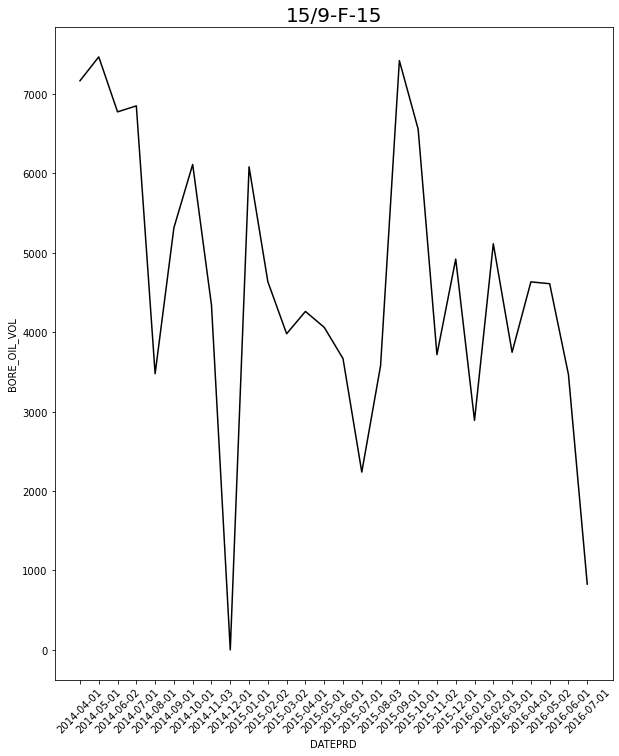

In [86]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-15',size=20)
plt.xticks(rotation = 45)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df2, ax=ax, color='black')


In [87]:
df2.shape

(28, 28)

Examine head of data

In [88]:
df2.head()

,level_0,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
257,275,3,2014-04-01,200.664000,106.575833,155.428800,21.926800,12.084126,45.235233,30.047467,16.099533,7163.0,0.0,0.0,0.0,15/9-F-15 D,224.100952,104.727250,181.700584,10.648497,6.584455,42.400460,19.755491,18.965781,6369.0,0.0,0.0,0.0
258,276,4,2014-05-01,198.730813,106.599781,156.177938,19.426437,12.238575,42.552906,32.418563,13.769063,7464.0,0.0,0.0,0.0,15/9-F-15 D,202.818426,106.265875,157.421994,16.716069,3.178223,45.396326,27.685886,16.040364,7684.0,0.0,0.0,0.0
259,277,5,2014-06-02,200.644345,106.555897,157.633793,17.977483,11.584496,43.010517,33.757069,14.301828,6772.0,0.0,0.0,0.0,15/9-F-15 D,201.687897,106.361069,156.783931,19.062207,4.440971,44.904103,29.462897,15.199828,6598.0,0.0,0.0,0.0
260,278,6,2014-07-01,199.381516,106.608355,157.688000,17.622129,11.544357,41.693419,34.690742,12.902742,6847.0,0.0,0.0,0.0,15/9-F-15 D,200.664000,106.575833,155.428800,21.926800,12.084126,45.235233,30.047467,16.099533,7163.0,0.0,0.0,0.0
261,279,7,2014-08-01,225.085129,105.069548,181.484806,11.104000,9.292741,43.600290,26.771290,23.006710,3476.0,0.0,0.0,0.0,15/9-F-15 D,198.730813,106.599781,156.177938,19.426437,12.238575,42.552906,32.418563,13.769063,7464.0,0.0,0.0,0.0


Drop 'index' and 'level_0' columns from df2

In [89]:
df2.drop(columns=['index','level_0'], inplace=True)

Reset index of dataframe

In [90]:
df2.reset_index(inplace=True)

Examine head of dataframe

In [91]:
df2.head()

,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,257,2014-04-01,200.664000,106.575833,155.428800,21.926800,12.084126,45.235233,30.047467,16.099533,7163.0,0.0,0.0,0.0,15/9-F-15 D,224.100952,104.727250,181.700584,10.648497,6.584455,42.400460,19.755491,18.965781,6369.0,0.0,0.0,0.0
1,258,2014-05-01,198.730813,106.599781,156.177938,19.426437,12.238575,42.552906,32.418563,13.769063,7464.0,0.0,0.0,0.0,15/9-F-15 D,202.818426,106.265875,157.421994,16.716069,3.178223,45.396326,27.685886,16.040364,7684.0,0.0,0.0,0.0
2,259,2014-06-02,200.644345,106.555897,157.633793,17.977483,11.584496,43.010517,33.757069,14.301828,6772.0,0.0,0.0,0.0,15/9-F-15 D,201.687897,106.361069,156.783931,19.062207,4.440971,44.904103,29.462897,15.199828,6598.0,0.0,0.0,0.0
3,260,2014-07-01,199.381516,106.608355,157.688000,17.622129,11.544357,41.693419,34.690742,12.902742,6847.0,0.0,0.0,0.0,15/9-F-15 D,200.664000,106.575833,155.428800,21.926800,12.084126,45.235233,30.047467,16.099533,7163.0,0.0,0.0,0.0
4,261,2014-08-01,225.085129,105.069548,181.484806,11.104000,9.292741,43.600290,26.771290,23.006710,3476.0,0.0,0.0,0.0,15/9-F-15 D,198.730813,106.599781,156.177938,19.426437,12.238575,42.552906,32.418563,13.769063,7464.0,0.0,0.0,0.0


Drop index column

In [92]:
df2.drop(columns=['index'], inplace=True)

Set 'DATEPRD' column as index.

In [93]:
df2.set_index('DATEPRD',inplace=True)

Convert index as datetime

In [94]:
df2.index = pd.to_datetime(df2.index)

Find datatypes for each column

In [95]:
df2.dtypes

AVG_DOWNHOLE_PRESSURE                float64
AVG_DOWNHOLE_TEMPERATURE             float64
AVG_DP_TUBING                        float64
AVG_ANNULUS_PRESS                    float64
AVG_CHOKE_SIZE_P                     float64
AVG_WHP_P                            float64
AVG_WHT_P                            float64
DP_CHOKE_SIZE                        float64
BORE_OIL_VOL                         float64
BORE_GAS_VOL                         float64
BORE_WAT_VOL                         float64
BORE_WI_VOL                          float64
NPD_WELL_BORE_NAME                    object
AVG_DOWNHOLE_PRESSURE.shifted3       float64
AVG_DOWNHOLE_TEMPERATURE.shifted3    float64
AVG_DP_TUBING.shifted3               float64
AVG_ANNULUS_PRESS.shifted3           float64
AVG_CHOKE_SIZE_P.shifted3            float64
AVG_WHP_P.shifted3                   float64
AVG_WHT_P.shifted3                   float64
DP_CHOKE_SIZE.shifted3               float64
BORE_OIL_VOL.shifted3                float64
BORE_GAS_V

In [96]:
df2.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-01,200.664000,106.575833,155.428800,21.926800,12.084126,45.235233,30.047467,16.099533,7163.0,0.0,0.0,0.0,15/9-F-15 D,224.100952,104.727250,181.700584,10.648497,6.584455,42.400460,19.755491,18.965781,6369.0,0.0,0.0,0.0
2014-05-01,198.730813,106.599781,156.177938,19.426437,12.238575,42.552906,32.418563,13.769063,7464.0,0.0,0.0,0.0,15/9-F-15 D,202.818426,106.265875,157.421994,16.716069,3.178223,45.396326,27.685886,16.040364,7684.0,0.0,0.0,0.0
2014-06-02,200.644345,106.555897,157.633793,17.977483,11.584496,43.010517,33.757069,14.301828,6772.0,0.0,0.0,0.0,15/9-F-15 D,201.687897,106.361069,156.783931,19.062207,4.440971,44.904103,29.462897,15.199828,6598.0,0.0,0.0,0.0
2014-07-01,199.381516,106.608355,157.688000,17.622129,11.544357,41.693419,34.690742,12.902742,6847.0,0.0,0.0,0.0,15/9-F-15 D,200.664000,106.575833,155.428800,21.926800,12.084126,45.235233,30.047467,16.099533,7163.0,0.0,0.0,0.0
2014-08-01,225.085129,105.069548,181.484806,11.104000,9.292741,43.600290,26.771290,23.006710,3476.0,0.0,0.0,0.0,15/9-F-15 D,198.730813,106.599781,156.177938,19.426437,12.238575,42.552906,32.418563,13.769063,7464.0,0.0,0.0,0.0


Create list from column names

In [97]:
items_list = list(df2.columns)

Create list of columns that we are not including in modelling

In [98]:
list_to_remove = ['AVG_DOWNHOLE_PRESSURE.shifted3',
 'AVG_DOWNHOLE_TEMPERATURE.shifted3',
 'AVG_DP_TUBING.shifted3',
 'AVG_ANNULUS_PRESS.shifted3',
 'AVG_CHOKE_SIZE_P.shifted3',
 'AVG_WHP_P.shifted3',
 'AVG_WHT_P.shifted3',
 'DP_CHOKE_SIZE.shifted3',
 'BORE_OIL_VOL.shifted3',
 'BORE_GAS_VOL.shifted3',
 'BORE_WAT_VOL.shifted3',
 'BORE_WI_VOL.shifted3','NPD_WELL_BORE_NAME','BORE_WI_VOL']

Drop irrelevant columns

In [99]:
df2.drop(columns=list_to_remove,inplace=True)

Create final list of columns to be included in modelling

In [100]:
columnlist = list(set(items_list)-set(list_to_remove))

In [101]:
columnlist

['AVG_WHP_P',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'BORE_GAS_VOL',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_WHT_P',
 'AVG_CHOKE_SIZE_P',
 'BORE_OIL_VOL',
 'AVG_DOWNHOLE_TEMPERATURE',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

Find correlation between target variable and each feature

In [102]:
for element in columnlist:
    print( element , df2['BORE_OIL_VOL'].corr(df2[element]))

AVG_WHP_P -0.26050969982712563
AVG_DP_TUBING -0.5462633362958363
AVG_ANNULUS_PRESS 0.7828752233589726
BORE_GAS_VOL 0.006914710263871956
AVG_DOWNHOLE_PRESSURE -0.7121418367326535
AVG_WHT_P 0.6626784951200836
AVG_CHOKE_SIZE_P 0.37398989586726
BORE_OIL_VOL 1.0
AVG_DOWNHOLE_TEMPERATURE 0.6463457281407984
DP_CHOKE_SIZE -0.5071758225579683
BORE_WAT_VOL -0.005975552848915779


Plot ACF to examine weather oil production time series is stationary.

Zero-differencing

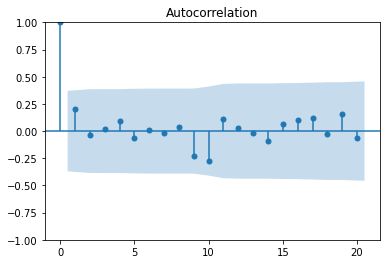

In [103]:
plot_acf(df2['BORE_OIL_VOL'], lags= 20, alpha=0.05);

From the plot we can see that the time series is stationary

Call adfuller function on time series

In [104]:
adfuller(df2['BORE_OIL_VOL'])

(-3.7066218109877997,
 0.0040209706865927,
 0,
 27,
 {'1%': -3.6996079738860943,
  '5%': -2.9764303469999494,
  '10%': -2.627601001371742},
 315.51423047087314)

The time series does not require differencing it is already stationary.

Split data Train/Test datasets

In [105]:
df2.tail(5)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,
2016-03-01,218.160839,105.842548,184.348968,16.219032,12.305040,33.811903,37.630516,17.960387,3746.0,0.0,5035.0
2016-04-01,232.322097,105.748387,197.699839,16.777710,19.452198,34.622387,36.326290,11.161452,4632.0,29.0,5787.0
2016-05-02,209.074633,106.246333,184.315067,18.663567,15.825980,24.759633,42.437867,8.121633,4609.0,0.0,5907.0
2016-06-01,212.926967,105.923067,184.994100,16.132400,23.024772,27.932900,40.764933,14.086767,3466.0,0.0,5390.0
2016-07-01,308.101258,92.706710,299.597355,4.271226,7.057121,8.503903,12.570806,9.004000,828.0,0.0,1173.0


In [106]:
Train=df2.loc[:'2016-03-01']

In [107]:
Test=df2.loc['2016-04-01':]

The last 4 months will serve as the test set

 <b>3.5.1 AR Model <b/> <a class="anchor" id="11"></a>

Create an AR model of order P=5 and D=0 .

In [108]:
ARIMA_model1 = ARIMA(Train['BORE_OIL_VOL'], order=(5,0,0))

Fit data to model

In [109]:
result = ARIMA_model1.fit()

Print summary results

In [110]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           BORE_OIL_VOL   No. Observations:                   24
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -213.014
Date:                Thu, 03 Mar 2022   AIC                            440.028
Time:                        22:52:26   BIC                            448.275
Sample:                    04-01-2014   HQIC                           442.216
                         - 03-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4763.9167    427.649     11.140      0.000    3925.741    5602.092
ar.L1          0.2294      0.209      1.098      0.272      -0.180       0.639
ar.L2         -0.0529      0.313     -0.169      0.8

The first model has an AIC score of 440 and BIC score of 448.

Try different combinations of p and d to find the best AR model.

Calculate and plot BIC for each model

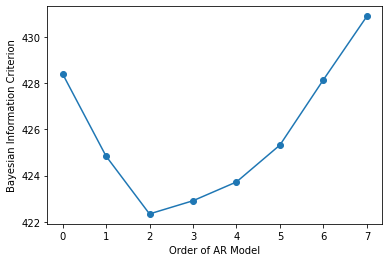

In [111]:
BIC = np.zeros(8)
for p in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(p,2,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(0,8), BIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

Calculate and plot AIC for each model

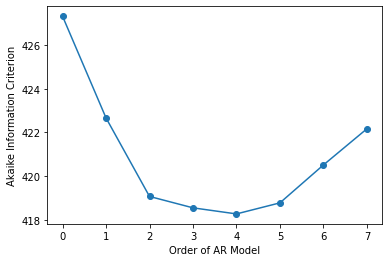

In [112]:
AIC = np.zeros(8)
for p in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(p,2,0))
    res = mod.fit()
# Save BIC for AR(p)    
    AIC[p] = res.aic
    
# Plot the aiC as a function of p
plt.plot(range(0,8), AIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

Fit the AR model with lowest BIC score to the data p = 2 and d = 0

In [113]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(2,0,0))
result = mod.fit()

Predict last 4 months of oil production

In [114]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    4528.725470
2016-05-02    4794.510406
2016-06-01    4788.363774
2016-07-01    4766.552915
Freq: BMS, Name: predicted_mean, dtype: float64

Create dataframe that will accumalete predictions of different models.

In [115]:
Summary =pd.DataFrame(Test['BORE_OIL_VOL'])

Save  AR model with the lowest AIC score to Summary dataframe p = 2 and d = 0

In [116]:
Summary['AR_order_2_difference_0']=result.predict(start='2016-04-01',end='2016-07-01')

Fit AR model with lowest AIC score to the data p = 4 and d = 0

In [117]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(4,0,0))
result = mod.fit()

Predict last 4 months of oil production

In [118]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    4422.208749
2016-05-02    4575.257392
2016-06-01    4715.855643
2016-07-01    4636.137133
Freq: BMS, Name: predicted_mean, dtype: float64

Add model result to summary

In [119]:
Summary['AR_order_4_difference_0']=result.predict(start='2016-04-01',end='2016-07-01')

Checking the summary table so far we have the predictions for the two AR models

In [120]:
Summary

,BORE_OIL_VOL,AR_order_2_difference_0,AR_order_4_difference_0
DATEPRD,,,
2016-04-01,4632.0,4528.725470,4422.208749
2016-05-02,4609.0,4794.510406,4575.257392
2016-06-01,3466.0,4788.363774,4715.855643
2016-07-01,828.0,4766.552915,4636.137133


 <b>3.5.2 MA Model <b/> <a class="anchor" id="12"></a>

Try different combinations of q and d to find the best AR model.

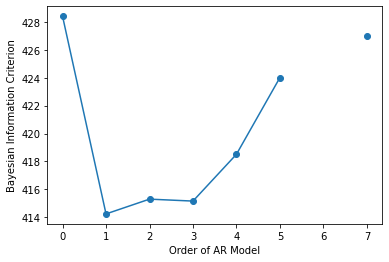

In [121]:
BIC = np.zeros(8)
for q in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,2,q))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[q] = res.bic
    
# Plot the BIC as a function of q
plt.plot(range(0,8), BIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

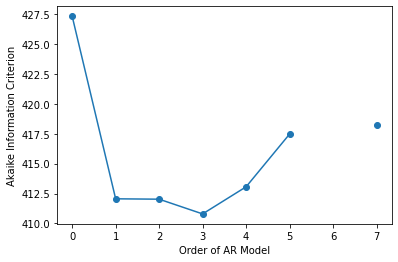

In [122]:
AIC = np.zeros(8)
for q in range(8):
    mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,2,q))
    res = mod.fit()
# Save BIC for AR(p)    
    AIC[q] = res.aic
    
# Plot the aiC as a function of q
plt.plot(range(0,8), AIC[0:8], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

The best MA models are the ones with d=0 and q=1 and q=3 based on the AIC and BIC scores

Fit MA model d=0 and q=1 to the training set.

In [123]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,0,1))
result = mod.fit()

Print model predictions

In [124]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    4508.551147
2016-05-02    4765.990404
2016-06-01    4765.990404
2016-07-01    4765.990404
Freq: BMS, Name: predicted_mean, dtype: float64

Save model predictions to Summary dataframe

In [125]:
Summary['MA_order_1_difference_0']=result.predict(start='2016-04-01',end='2016-07-01')

Fit MA model d=0 and q=3 to the training set.

In [126]:
mod = ARIMA(Train['BORE_OIL_VOL'], order=(0,0,3))
result = mod.fit()

Print model predictions

In [127]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    4517.064903
2016-05-02    4790.521617
2016-06-01    4789.759373
2016-07-01    4762.981843
Freq: BMS, Name: predicted_mean, dtype: float64

Save model predictions to Summary dataframe

In [128]:
Summary['MA_order_3_difference_0']=result.predict(start='2016-04-01',end='2016-07-01')

Check Summary dataframe

In [129]:
Summary

,BORE_OIL_VOL,AR_order_2_difference_0,AR_order_4_difference_0,MA_order_1_difference_0,MA_order_3_difference_0
DATEPRD,,,,,
2016-04-01,4632.0,4528.725470,4422.208749,4508.551147,4517.064903
2016-05-02,4609.0,4794.510406,4575.257392,4765.990404,4790.521617
2016-06-01,3466.0,4788.363774,4715.855643,4765.990404,4789.759373
2016-07-01,828.0,4766.552915,4636.137133,4765.990404,4762.981843


 <b>3.5.3 ARIMA Model <b/> <a class="anchor" id="13"></a>

The ARIMA model is a combination of the AR model and MA model with differencing

Iterate through different ARIMA models with p from 0 to 6, d=0 and q from 0 to 6.

In [130]:
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(Train['BORE_OIL_VOL'], order=(p,2,q),initialization='approximate_diffuse')
        results = model.fit()        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
        print(p,q,results.aic, results.bic)

0 0 480.8598948440973 482.03794867444526
0 1 469.57712946502727 471.93323712572317
0 2 466.5528080989276 470.08696958997143
0 3 469.1440682432803 473.8562835646721
0 4 472.41471571700265 478.3049848687424
0 5 470.97611841496314 478.04444139705083
0 6 nan nan
1 0 474.811477976191 477.1675856368869
1 1 470.0452218018423 473.5793832928861
1 2 468.5549809986727 473.2671963200645
1 3 470.4667286875716 476.35699783931136
1 4 472.91162104227544 479.97994402436314
1 5 473.71264008416534 481.959016896601
1 6 nan nan
2 0 471.28650944800984 474.8206709390537
2 1 470.138193929359 474.8504092507508
2 2 469.2508945112136 475.1411636629533
2 3 470.6068660096484 477.6751889917361
2 4 472.5795611906271 480.82593800306273
2 5 2.93865343144358e+17 2.93865343144358e+17
2 6 nan nan
3 0 469.69663081801343 474.4088461394052
3 1 470.20366169747643 476.0939308492162
3 2 471.2457065896926 478.3140295717803
3 3 472.30421833462213 480.5505951470578
3 4 495.1836259713683 504.6080566141519
3 5 50715931498071.89 507

Order models by AIC score

In [131]:
order_aic_bic_ordered = sorted(order_aic_bic,key=itemgetter(2))

Print order_aic_bic_ordered

In [132]:
order_aic_bic_ordered

[(0, 2, 466.5528080989276, 470.08696958997143),
 (1, 2, 468.5549809986727, 473.2671963200645),
 (0, 3, 469.1440682432803, 473.8562835646721),
 (2, 2, 469.2508945112136, 475.1411636629533),
 (0, 1, 469.57712946502727, 471.93323712572317),
 (3, 0, 469.69663081801343, 474.4088461394052),
 (1, 1, 470.0452218018423, 473.5793832928861),
 (2, 1, 470.138193929359, 474.8504092507508),
 (3, 1, 470.20366169747643, 476.0939308492162),
 (1, 3, 470.4667286875716, 476.35699783931136),
 (2, 3, 470.6068660096484, 477.6751889917361),
 (4, 0, 470.77672442678045, 476.6669935785202),
 (5, 0, 470.949649684348, 478.0179726664357),
 (0, 5, 470.97611841496314, 478.04444139705083),
 (3, 2, 471.2457065896926, 478.3140295717803),
 (2, 0, 471.28650944800984, 474.8206709390537),
 (4, 2, 472.3032534205806, 480.5496302330162),
 (3, 3, 472.30421833462213, 480.5505951470578),
 (5, 1, 472.40058744246494, 480.6469642549006),
 (0, 4, 472.41471571700265, 478.3049848687424),
 (2, 4, 472.5795611906271, 480.82593800306273),
 

ARIMA p = 0, d = 0, q = 2 has the lowest AIC score and a BIC score.

Fit data to the model

In [133]:
model = SARIMAX(Train['BORE_OIL_VOL'], order=(0,0,2),initialization='approximate_diffuse')
result = model.fit()

Save model predictions to Summary dataframe

In [134]:
Summary['ARIMA_p_order_0_difference_0_q_order_2']=result.predict(start='2016-04-01',end='2016-07-01')

<b> 3.5.4 ARIMAX Model <b/> <a class="anchor" id="14"></a>

ARIMAX models are ARIMA models with the exogeneous variables. The following are used as exogeneous variables: 'AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_WHT_P','BORE_GAS_VOL','DP_CHOKE_SIZE','AVG_CHOKE_SIZE_P','AVG_DOWNHOLE_TEMPERATURE','AVG_WHP_P','BORE_WAT_VOL'.

Iterate through different ARIMAX models with p from 0 to 6, d=0 and q from 0 to 6.

In [135]:
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(Train['BORE_OIL_VOL'], order=(p,0,q),exog=Train[['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']],initialization='approximate_diffuse')
        results = model.fit()        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
        print(p,q,results.aic, results.bic)

0 0 415.6580329981251 426.26051747125666
0 1 398.5032254622785 410.28376376575795
0 2 393.1660537649808 406.1246458988082
0 3 397.1959977279319 411.33264369210724
0 4 396.0356457293731 411.35034552389635
0 5 398.5343499836715 415.02710360854275
0 6 nan nan
1 0 403.111581480686 414.89211978416546
1 1 399.8020948433672 412.76068697719455
1 2 393.1138244446392 407.2504704088145
1 3 398.5361265592869 413.8508263538102
1 4 398.15312819852136 414.6458818233926
1 5 395.228903492063 412.8997109472822
1 6 nan nan
2 0 401.77227623893873 414.7308683727661
2 1 398.6997666350388 412.83641259921416
2 2 395.2802941524794 410.5949939470027
2 3 399.2161267036064 415.7088803284776
2 4 403.37297202919706 421.04377948441623
2 5 396.60169835044985 415.450559636017
2 6 nan nan
3 0 403.12617342485004 417.26281938902537
3 1 401.24674025837476 416.56144005289804
3 2 396.1354216340317 412.6281752589029
3 3 399.85094540334666 417.52175285856583
3 4 398.73510969179733 417.58397097736446
3 5 521.8752436900311 541.

Order models by AIC score

In [136]:
order_aic_bic_ordered = sorted(order_aic_bic,key=itemgetter(2))

Print order_aic_bic_ordered

In [137]:
order_aic_bic_ordered

[(1, 2, 393.1138244446392, 407.2504704088145),
 (0, 2, 393.1660537649808, 406.1246458988082),
 (1, 5, 395.228903492063, 412.8997109472822),
 (2, 2, 395.2802941524794, 410.5949939470027),
 (4, 2, 395.5399252564499, 413.2107327116691),
 (0, 4, 396.0356457293731, 411.35034552389635),
 (3, 2, 396.1354216340317, 412.6281752589029),
 (2, 5, 396.60169835044985, 415.450559636017),
 (4, 0, 397.19587481584574, 412.510574610369),
 (0, 3, 397.1959977279319, 411.33264369210724),
 (4, 1, 397.4302843261, 413.9230379509712),
 (1, 4, 398.15312819852136, 414.6458818233926),
 (4, 3, 398.4746379151738, 417.3234992007409),
 (0, 1, 398.5032254622785, 410.28376376575795),
 (0, 5, 398.5343499836715, 415.02710360854275),
 (1, 3, 398.5361265592869, 413.8508263538102),
 (2, 1, 398.6997666350388, 412.83641259921416),
 (3, 4, 398.73510969179733, 417.58397097736446),
 (6, 0, 398.9747490313566, 416.6455564865758),
 (2, 3, 399.2161267036064, 415.7088803284776),
 (5, 2, 399.6804796229504, 418.5293409085175),
 (1, 1, 3

The model with the lowest AIC score and BIC score is the model with p = 0 and q = 2.

In [138]:
model = SARIMAX(df1['BORE_OIL_VOL'], order=(0,0,2),initialization='approximate_diffuse')
result = model.fit()

Print model predictions

In [139]:
result.predict(start='2016-04-01',end='2016-07-01')

2016-04-01    1696.080481
2016-05-02    1241.064791
2016-06-01    2308.020904
2016-07-01    2089.952353
Freq: BMS, Name: predicted_mean, dtype: float64

Save model predictions to Summary dataframe

In [140]:
Summary['ARIMAX_p_order_0_difference_0_q_order_2']=result.predict(start='2016-04-01',end='2016-07-01')

Print Summary dataframe

In [141]:
Summary

,BORE_OIL_VOL,AR_order_2_difference_0,AR_order_4_difference_0,MA_order_1_difference_0,MA_order_3_difference_0,ARIMA_p_order_0_difference_0_q_order_2,ARIMAX_p_order_0_difference_0_q_order_2
DATEPRD,,,,,,,
2016-04-01,4632.0,4528.725470,4422.208749,4508.551147,4517.064903,3295.988848,1696.080481
2016-05-02,4609.0,4794.510406,4575.257392,4765.990404,4790.521617,1493.990442,1241.064791
2016-06-01,3466.0,4788.363774,4715.855643,4765.990404,4789.759373,0.000000,2308.020904
2016-07-01,828.0,4766.552915,4636.137133,4765.990404,4762.981843,0.000000,2089.952353


Transpose Summary dataframe

In [142]:
Summary.transpose()

DATEPRD,2016-04-01,2016-05-02,2016-06-01,2016-07-01
BORE_OIL_VOL,4632.000000,4609.000000,3466.000000,828.000000
AR_order_2_difference_0,4528.725470,4794.510406,4788.363774,4766.552915
AR_order_4_difference_0,4422.208749,4575.257392,4715.855643,4636.137133
MA_order_1_difference_0,4508.551147,4765.990404,4765.990404,4765.990404
MA_order_3_difference_0,4517.064903,4790.521617,4789.759373,4762.981843
ARIMA_p_order_0_difference_0_q_order_2,3295.988848,1493.990442,0.000000,0.000000
ARIMAX_p_order_0_difference_0_q_order_2,1696.080481,1241.064791,2308.020904,2089.952353


Create new dataframe Summaryt which is the transposed version of Summary dataframe.

In [143]:
Summaryt=Summary.transpose()

Remove first row of Summaryt.

In [144]:
Summaryt = Summaryt.iloc[1:]

Examine Summaryt dataframe.

In [145]:
Summaryt

DATEPRD,2016-04-01,2016-05-02,2016-06-01,2016-07-01
AR_order_2_difference_0,4528.725470,4794.510406,4788.363774,4766.552915
AR_order_4_difference_0,4422.208749,4575.257392,4715.855643,4636.137133
MA_order_1_difference_0,4508.551147,4765.990404,4765.990404,4765.990404
MA_order_3_difference_0,4517.064903,4790.521617,4789.759373,4762.981843
ARIMA_p_order_0_difference_0_q_order_2,3295.988848,1493.990442,0.000000,0.000000
ARIMAX_p_order_0_difference_0_q_order_2,1696.080481,1241.064791,2308.020904,2089.952353


Create a list of the dates out of Summary.index

In [146]:
Columns = list(Summary.index)

Add 'MAPE" column to Columns list.

In [147]:
Columns.append('MAPE')

Create performance dataframe using the Columns list as the columns.

In [148]:
Performance = pd.DataFrame(columns=Columns)

Call Performance dataframe

In [149]:
Performance

,2016-04-01 00:00:00,2016-05-02 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE


Create list out of Summary Columns

In [150]:
Summary_Columns = list(Summary.columns)

Remove 'BORE_OIL_VOL' from list

In [151]:
Summary_Columns.remove('BORE_OIL_VOL')

Call Summay_Columns list

In [152]:
Summary_Columns

['AR_order_2_difference_0',
 'AR_order_4_difference_0',
 'MA_order_1_difference_0',
 'MA_order_3_difference_0',
 'ARIMA_p_order_0_difference_0_q_order_2',
 'ARIMAX_p_order_0_difference_0_q_order_2']

Create list out of Model names

In [153]:
Indexes = ['AR_order_2_difference_2', 'AR_order_0_difference_0',
       'MA_order_1_difference_0', 'MA_order_3_difference_0',
       'ARIMA_p_order_0_difference_0_q_order_2',
       'ARIMAX_p_order_0_difference_0_q_order_2']

Define MAPE function

In [154]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

Append Performance dataframe with APE and MAPE for each model.

In [155]:
index=0
for element in range(6):
    Performance.loc[Indexes[index]] = [mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-05-02 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       (mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-05-02 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]))/4
                                      ]
    index =index + 1

 <b>3.5.5 Performance of Models<b/> <a class="anchor" id="15"></a>

Call Performance dataframe

In [156]:
Performance.head(6)

,2016-04-01 00:00:00,2016-05-02 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
AR_order_2_difference_2,3.508428,4.024960,38.329787,479.047151,131.227581
AR_order_0_difference_0,1.225013,0.732103,32.003964,452.567318,121.632099
MA_order_1_difference_0,2.892712,3.406171,37.506936,475.602706,129.852131
MA_order_3_difference_0,3.422315,3.938417,38.214703,478.565413,131.035212
ARIMA_p_order_0_difference_0_q_order_2,67.746320,67.585367,56.895833,80.433628,68.165287
ARIMAX_p_order_0_difference_0_q_order_2,73.206719,73.073014,64.193168,49.887052,65.089988


Save Performance dataframe as CSV

In [157]:
Performance.to_csv('df2Performance.csv') 

 <b>Summary<b/> <a class="anchor" id="16"></a>

The best models for both wells are the ARIMAX models and as expected the simple models performed significantly worse than the ARIMAX models. Also as expected the F-14 well which followed a typical decline curve was easier to model than the F-15 model which did not follow a typical decline curve(35% MAPE vs 65% MAPE for the ARIMAX Models). In the next notebook we will use advanced algorithms to train our oil production data for both wells and see if we could improve our predictions for both wells.